# Introduction to Scikit-Learn (sklearn)


In [187]:

covering = ["* 0. Scikit-Learn workflow",
            "* 1. Getting the data ready",
            "* 2. Choose the right estimator (aka. algorithm/model) for the problems",
            "* 3. Fit the model/algorithm/estimator and use it to make predictions on the data",
            "* 4. Evaluating the model",
            "* 5. Improve the model",
            "* 6. Save and load the trained model",
            "* 7. Putting it all toghether ('Intro-sklearn-combine-all'  notebook)"]
covering

['* 0. Scikit-Learn workflow',
 '* 1. Getting the data ready',
 '* 2. Choose the right estimator (aka. algorithm/model) for the problems',
 '* 3. Fit the model/algorithm/estimator and use it to make predictions on the data',
 '* 4. Evaluating the model',
 '* 5. Improve the model',
 '* 6. Save and load the trained model',
 "* 7. Putting it all toghether ('Intro-sklearn-combine-all'  notebook)"]

In [2]:
import numpy as np

# 0. End-to-end Scikit-Learn workflow

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# "X" (features matrix) is all the columns exept the "target" column
X = heart_disease.drop("target", axis=1)

# "y" (label matrix) is the "target" columns
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier   # Classification is predicting a label
clf = RandomForestClassifier(n_estimators=100)

# we'll keep the dafault hypeerparameters
clf.get_params()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the data ()
from sklearn.model_selection import train_test_split

# Split the data in to trainin_data and testing_data ("test_size=0.2", 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Looking ro the patterns in the training data
clf.fit(X_train, y_train);

In [8]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [9]:
y_test

28     1
168    0
201    0
176    0
244    0
      ..
24     1
267    0
62     1
184    0
292    0
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and test data

# This returnes the mean accurasy on the diven test data and labels
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.819672131147541

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Steps to evaluate the module
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        35
           1       0.74      0.88      0.81        26

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[27,  8],
       [ 3, 23]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [15]:
# 5. Improve the model
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accurasy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accurasy on test set: 77.05%

Trying model with 20 estimators...
Model accurasy on test set: 80.33%

Trying model with 30 estimators...
Model accurasy on test set: 86.89%

Trying model with 40 estimators...
Model accurasy on test set: 81.97%

Trying model with 50 estimators...
Model accurasy on test set: 83.61%

Trying model with 60 estimators...
Model accurasy on test set: 83.61%

Trying model with 70 estimators...
Model accurasy on test set: 85.25%

Trying model with 80 estimators...
Model accurasy on test set: 83.61%

Trying model with 90 estimators...
Model accurasy on test set: 81.97%



In [16]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
# Load the model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.819672131147541

In [18]:
covering

['* 0. Scikit-Learn workflow',
 '* 1. Getting the data ready',
 '* 2. Choose the right estimator (aka. algorithm/model) for the problems',
 '* 3. Fit the model/algorithm/estimator and use it to make predictions on the data',
 '* 4. Evaluating the model',
 '* 5. Improve the model',
 '* 6. Save and load the trained model',
 '* 7. Putting it all toghether']

#  Getting the data ready to be used with machine learning

Three main things to do:
    1. Split the data in to features and labels (usually "X" and "y")
    2. Filling (aka. imputing or disregarding the missing values)
    3. Converting non-numerical values to numerical values (aka. feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Remove the columns "target"
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
# The target column
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Splitting the data in to training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape

(303, 13)

In [25]:
len(heart_disease)

303

# 1.1 Make sure it's all numerical

In [26]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split the data in to X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training /test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [30]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor  # Regression is predicting a quantity.

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

It's not going to work since we need to convert the objects to integers

In [31]:
# Turning the categoreis in to numbers using Scikit-Learn (advised)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the columns we eant to trasnformed
categorical_features = ["Make", "Colour", "Doors"]

#A process used to turn categories in to numbers
one_hot = OneHotEncoder()

#"ColumnTransformer" takes the "OneHotencoder/one_hot" and applies the "categorical_features"
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")   # Remainder of the columns are being passed through

# Data "X" being ".fit" in transformer
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
# Turning data in to numbers using Pandas (NOT RECOMENDED) --> "Doors" is already numerical so it doesn't work here
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [35]:
# Refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
# Evaluate the model
model.score(X_test, y_test)

0.3235867221569877

## 1.2 If there are missing values

1. Fill with some value (imputation)
2. Remove the sample with missing data altogether

In [37]:
# Importing the data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
# Cheking if there is missing data with ".isna()"
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# Split the data X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [40]:
# Turning data in to numbers using Scikit-Learn (advised)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the columns we eant to trasnformed
categorical_features = ["Make", "Colour", "Doors"]

#A process used to turn categories in to numbers
one_hot = OneHotEncoder()

#"ColumnTransformer" takes the "OneHotencoder/one_hot" and applies the "categorical_features"
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")   # Remainder of the columns are being passed through

# Data "X" being ".fit" in transformer
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

## Option 1: Fill missing data with Pandas

In [41]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [42]:
# Check the DataFrame
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
# Remove rows with missing "Price" value ".dropna"
car_sales_missing.dropna(inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [45]:
len(car_sales_missing)

950

In [46]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [47]:
# Turning data in to numbers using Scikit-Learn (advised)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the columns we eant to trasnformed
categorical_features = ["Make", "Colour", "Doors"]

#A process used to turn categories in to numbers
one_hot = OneHotEncoder()

#"ColumnTransformer" takes the "OneHotencoder/one_hot" and applies the "categorical_features"
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")   # Remainder of the columns are being passed through

# Data being ".fit" in transformer
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Fill missing values with Scikit-Learn

In [48]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
# Get rid ofthe rows that have missing "Price" values
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

# Split in to X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [52]:
X.isna().sum(), X.shape, y.shape

(Make             47
 Colour           46
 Odometer (KM)    48
 Doors            47
 dtype: int64,
 (950, 4),
 (950,))

In [53]:
# Fill missing values
from sklearn.impute import SimpleImputer   # "SimpleImputer" class, fills in missing data
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with ".mean()"
# 1."strategy" keeping it "constant" --> going through all the values
# 2. "fill_value" --> fill in the missing value with the given value
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") 
door_imputer = SimpleImputer(strategy="constant", fill_value=4)   
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
# With the "ColumnTransformer" class create an "imputer" passing in the imputations/transformations we want to do
# "ColumnTransformer" takes a list of tulples as an argument
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [54]:
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])
# Check training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

## Now we can convet the data in to numbers

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                  remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check thansformed_X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [57]:
# After transforming the data, fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Use the transformed data
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for a problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predictiong a number

## 2.1 Picking a machine learning model for a regression proble

In [58]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [59]:
# Put the data in to a DataFrame
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

# Make the "target" column in to a "pd.Series"
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
# How many samples
len(boston_df)

506

In [61]:
# Try the Ridge Regression nodel
from sklearn.linear_model import Ridge

# Set up a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]


# Split in to train/test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score on the Ridge model with the test data
result_1 = model.score(X_test, y_test)
result_1

0.6662221670168519

How to improve the score

What if Ridge wasn't working

In [62]:
# Try the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Insatantiate RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Check the score on the RandomForestRegressor witht the test data
result_2 = clf.score(X_test, y_test)
result_2

0.8654448653350507

In [63]:
# Check the Ridge model vs RandomForestRegressor
print(f"Ridge model: {result_1}\nRandomForestRregressor: {result_2}")

Ridge model: 0.6662221670168519
RandomForestRregressor: 0.8654448653350507


## 2.2 Choosing estimator for a calssification problem

In [64]:
# Import data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* Trying "LinearSVC"

In [65]:
from sklearn import svm

# Set seed
np.random.seed(42)

# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
clf = svm.SVC(max_iter=10000)
clf.fit(X_train, y_train)

# Test
test_result_1 = clf.score(X_test, y_test)
result_1

0.6662221670168519

* Try RendomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test
result_2 = model.score(X_test, y_test)
result_2

0.8360655737704918

In [67]:
print(f"scv model:  {result_1}\nRandomForestClassifier model:  {result_2}")

scv model:  0.6662221670168519
RandomForestClassifier model:  0.8360655737704918


Tidbit:
    
    1. If you have STRUCTURED data, use ensemble methods (ex: DataFrame)
    2. If you have UNSTRUCTURED data, use deep learning or transform learning (ex: Images)

## 3. Fit the model/algorithm on the data and use it to make predictions

### 3.1 Fitting the model to the data

In [68]:
# Import RandomForestClassificatier estimato calss
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model
Ways to make predictions:
    1. predict()   function
    2. predict_proba() function

#### Make predictions with `predict()`

In [69]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))   # This doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [70]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [71]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [72]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
# Compare predictions to train labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)    # comparing

0.8524590163934426

In [74]:
clf.score(X_test, y_test)

0.8524590163934426

In [75]:
# Othe way to compare
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### Make predictions with `predict_proba()`
predict_proba() returns probabilities of a clasification label

In [76]:
# Returning the probability of the label being true
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [77]:
0.89+0.11, 0.49+0.51 #...

(1.0, 1.0)

In [78]:
# predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

#### `predict()` for regresion models

In [79]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

# Instantiate and fir model                         
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [81]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [82]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
# On average away from the truth

2.136382352941176

## 4. Evaluating a machine learning model

Three ways o evaluate Scikit-Learn models/estimators:
  1. Estimator `score` method
  2. The `scoring` parameter
  3. Problem-specific metric function

### 4.1 Evaluating a model with the `score` method

In [83]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)


RandomForestClassifier()

In [84]:
# Training data
clf.score(X_train, y_train)

1.0

In [85]:
# Returns the mean accuracy on the given test data and labels
clf.score(X_test, y_test)

0.8524590163934426

##### The same but with Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

model =  RandomForestRegressor().fit(X_train, y_train)

In [87]:
# Return the coefficient of determination R^2 of the prediction
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [88]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [89]:
clf.score(X_test,y_test)

0.8524590163934426

In [90]:
cross_val_score(clf, X, y, cv=5)  # "cv" number of times being tested

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

#### Cross validation:
<img src="images/sklearn-cross-validation.png">

In [91]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Mean of 5-fold cross_val_score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [92]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accurcy
2. Area under ROC curve
3. Cunfusion matrix
4. Classification report

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [94]:
np.mean(cross_val_score)

0.8248087431693989

In [95]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


**Area under the reciver operating characteristic curve (AUC/ROC)**
* Are under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True possitive = model predicts 1 when truth is 1
* False possitive = model predicts 1 when truth is 0
* True neagative = model predicts 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [96]:
# create X_test .... ect
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with pribabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [98]:
# Get the column 1: with positive "1"
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [99]:
# Calculate fpr, tpr and threshlods
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

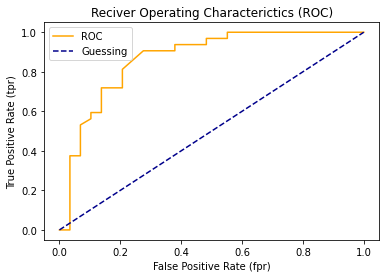

In [100]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power(baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Costumize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Reciver Operating Characterictics (ROC)")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)    

In [101]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

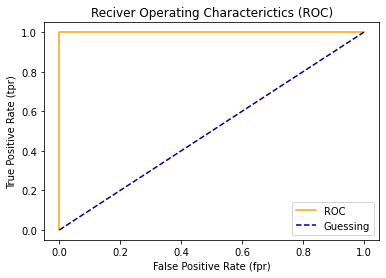

In [102]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

#### Confusion Matrix

A confusion matrix is a quick way to compare the label a model predicts and the actual 
label it was supposed to predict.

Giving an idea of where the model is getting confused.

In [103]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [104]:
# Visualize confusion matrix with "pd.crosstab()"
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])


Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [105]:
23 + 6 + 6 + 26

61

In [106]:
len(y_preds)

61

<img src="images\sklearn-confusion-matrix-anatomy.png">

##### Make the confusion matrix more visual with Seaborn's heatmap()

In [107]:
# Install a conda package into the current enviornment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


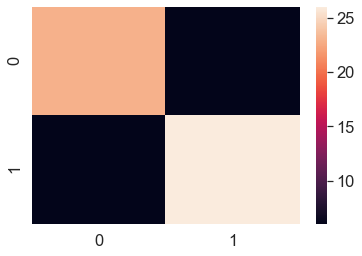

In [108]:
import seaborn as sns


# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_preds, y_test)

# Plot using seaborn
sns.heatmap(conf_mat);

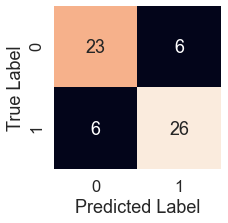

In [109]:
def plot_conf_mat(conf_mat):
    '''
    Plots a confusion matrix using seaborn heatmap
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    sx = sns.heatmap(conf_mat,
                     annot=True,  # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_conf_mat(conf_mat)

#### Classification Report

In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



#### Example where precision and recall become valuable

In [111]:
# Ex an array of 10000 people
disease_true = np.zeros(10000)

# Only one positive case
disease_true[0] = 1

# Model predicts every case as 0
disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict=True))

C:\Users\mkcle\Desktop\sample_project1\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


##### Classification metrics:
    
* `Accurary` is good measuring to start with if all classes are balanced(e.g. some amount of samples wich are labelled
       with 0 and 1).
* `Precision` and `recall` become more important when classes are inbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse that false positives, aim for higher recall
* `F1-score` is a combination of precision and recall

### 4.2.2 Regresion model evaluation metrics

Model regresion metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

#### R^2
What is R^2 does: Compares your models predictions to the mean of the targets. Values can range
                from negative infinity (a very poor model) to 1. 
                
Example: If all your model does is predict the mean of the targets , its R^2 values would be 0.
         If your model perferctly predicts a range of numbers its R^2 values would be 1.

In [112]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [113]:
model.score(X_test, y_test)

0.8654448653350507

In [114]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [115]:
r2_score(y_test, y_test_mean)

0.0

In [116]:
r2_score(y_test, y_test)

1.0

#### Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and the absolute values. It gives 
you and idea of how wrong your models predictions are.

In [117]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [118]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


#### Mean squared error (MSE)

In [119]:
from sklearn.metrics import mean_squared_error

Y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [120]:
# Calculate MSE by hand
np.square(df["differences"]).mean()

9.867437068627442

### 4.2.3 Using the `scoring` parameter

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [122]:
np.random.seed(42)


cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [123]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {cv_acc.mean()*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [124]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross_validated accuracy is : {cv_acc.mean()*100:.2f}%")

The cross_validated accuracy is : 82.48%


In [125]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [126]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [127]:
# Combination of precision and recall
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

* For regression models

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [129]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [130]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [131]:
# Mean Absolute Error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [132]:
# Mean Squared Error

cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

### 4.3 Different evaluation metrics as Scikt-Learn functions

#### Classification evaluation functions

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrix on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrix on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


#### Regression evaluation functions

In [134]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using the regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
Mean Absolute Error: 2.136382352941176
Mean Squared Error: 9.867437068627442


In [135]:
covering

['* 0. Scikit-Learn workflow',
 '* 1. Getting the data ready',
 '* 2. Choose the right estimator (aka. algorithm/model) for the problems',
 '* 3. Fit the model/algorithm/estimator and use it to make predictions on the data',
 '* 4. Evaluating the model',
 '* 5. Improve the model',
 '* 6. Save and load the trained model',
 '* 7. Putting it all toghether']

# 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data prespective:
* Could we collect more data? (generally, the more data the better)
* Could we improve our data?  (more information about each sample)

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data.
* Hyperparameters = setting on the model you can adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [163]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier()

In [164]:
# Find the models hyperparametes with ".get_params()"
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 ### 5.1 Tuning Hyperparameters by hand
 
 Make 3 sets:
 * training
 * validation
 * test

Going to adjust the fallowing:
* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [165]:
# Create function if you know you want to do something more than once
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels
    on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    # Create a dictionary
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [166]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data (shuffle all the rows randomly)
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split the data: X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data: train, validation, test
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of training
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of validation
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on valuation set witht the function made before
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [167]:
np.random.seed(42)

# Create a secound classifier witht a different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparametes
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [168]:
np.random.seed(42)

clf_3 = RandomForestClassifier(n_estimators=200, 
                              max_depth=10)
clf_3.fit(X_train, y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


### 5.2 Hyperparameter tuning with `RandomizedSearchCV`

`Important` When comparing different models make sure they are compared on the same data splits

In [169]:
from sklearn.model_selection import RandomizedSearchCV

# Create a grip of hyperparameters we'd like to adjust
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Seed for reproducibility
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# InstantiateRandomForestClassifier
# "n_jobs=1" --> one computer processor to dedicate towards this machine learning model
# "n_jobs=-1" --> all computer processors to dedicate towards this machine learning model
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,     # "n_iter" number of models to try
                            cv=5,
                            verbose=2,
                            random_state=42,  # set "random_state" to 42 for reproducibility
                            refit=True) # set "refit=True"(default) to refit the best model on the full data 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   4.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   4.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   4.1s
[CV] n_estimators=1200, min_samples_split=2, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [170]:
# ".best_params" --> shows what combination got the best results
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [171]:
# Make predictions with the beset hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV
It goes through every possible combination (need a powerful computer)

In [172]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [173]:
# Based on the RandomizedSearchCV "grid" parameters adjust it for "GridSearchCV"
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [174]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split data in to X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2,
                      refit=True)  # to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.8s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.7s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   55.8s finished


In [175]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [176]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


##### Compare different models metrics.

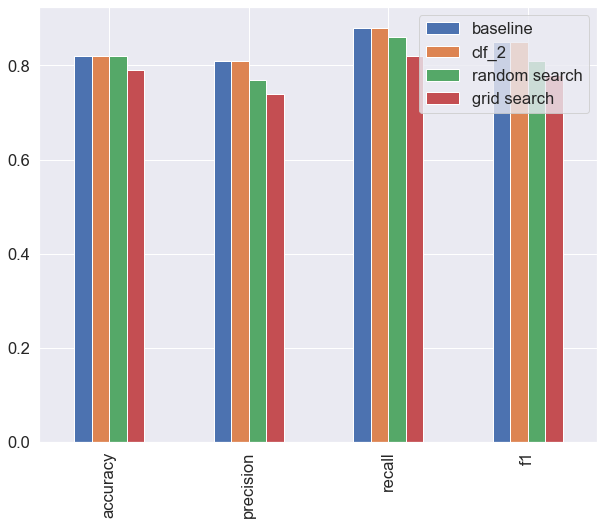

In [177]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6 saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

### 6.1 With `pickle`

In [178]:
import pickle

# Save an existing model to file
# 1. name of the model
# 2. "open()" how we want to name the exported model
# 3. "wb"--> `write binary` because we're writing a file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [179]:
# Load a saved model
# "rb" --> `read binary` 
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [180]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### 6.2 With `joblib`

I the model is large it might be more efficient to use `joblib` over `pickle`

In [181]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [182]:
# Import a saved `joblib` model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [184]:
# Make a evaluate joblib redictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# 7. Putting it all together

In [189]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [190]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [191]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [210]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop row with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                     transformers=[
                         ("cat", categorical_transformer, cat_features),
                         ("door", door_transformer, door_feature),
                         ("num", numeric_transformer, num_features)
                     ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

#### Useing `GridSearchCV` or `RandomizedSearchCV` with `Pipeline`

In [213]:
# Use "GridSearchCV" with the regression "Pipeline"
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   4.5s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   3.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  3.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [214]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [215]:
covering

['* 0. Scikit-Learn workflow',
 '* 1. Getting the data ready',
 '* 2. Choose the right estimator (aka. algorithm/model) for the problems',
 '* 3. Fit the model/algorithm/estimator and use it to make predictions on the data',
 '* 4. Evaluating the model',
 '* 5. Improve the model',
 '* 6. Save and load the trained model',
 "* 7. Putting it all toghether ('Intro-sklearn-combine-all'  notebook)"]